In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from hmmlearn import hmm
import os
import datetime
import matplotlib.pyplot as plt

import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta2

#pip install --upgrade google-cloud-bigquery[bqstorage,pandas]
#pip install --upgrade google-auth
%load_ext google.cloud.bigquery
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="Covid-19-be0adf05131c.json"

In [ ]:
%%bigquery jhu_summary
SELECT * FROM `bigquery-public-data.covid19_jhu_csse.summary`
jhu_summary['country_region'].value_counts()

In [275]:
#JHU summary
startdate = datetime.datetime.strptime('2020-02-15','%Y-%m-%d').date()
enddate = datetime.datetime.strptime('2020-04-11','%Y-%m-%d').date()
jsummary = jhu_summary[jhu_summary['country_region']=='Japan'][jhu_summary['date']>=startdate][jhu_summary['date']<=enddate]
jsummary= jsummary.sort_values("date")

tjsummary = jsummary.transpose()
dateindex = tjsummary.loc['date',:].to_list()
tjsummary.columns = dateindex

filterlist = ['retail_and_recreation_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [280]:
#Mobility
mobility = pd.read_csv('Global_Mobility_Report.csv')
country = mobility['country_region'].value_counts()
countrylist = country.index.to_list()

jmobility = mobility[mobility['country_region']=='Japan'][mobility['sub_region_1'].isnull()]
tjmobility = jmobility.transpose()
dateindex = tjmobility.loc['date',:].to_list()
tjmobility.columns = dateindex
tjmobility = tjmobility.loc[filterlist,:]

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [282]:
#Merge mobility and summary
df = tjsummary.copy()

for i in filterlist:
    appendlist = tjmobility.loc[i,:].to_list()
    df.loc[i,:] = appendlist

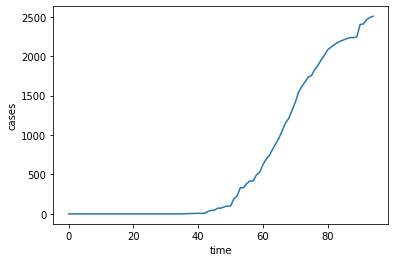

In [30]:
labels = Greece.columns
labels = labels[5:]
df = Greece.loc[:,labels]
df = df.rename(index={0:'cases'})
length = len(df.columns)

#Time related
time = pd.Series(pd.period_range('1/22/2020', freq='D', periods=length))
timedf = time.to_frame().transpose()
timelength = len(timedf.count())
lst = list(range(0, timelength))
timeframe = pd.DataFrame(lst)
timeframe = timeframe.transpose()

df.columns = lst
df = df.append(timeframe, ignore_index = False)
df = df.rename(index={0:'time'})
df = df.transpose()

sns.lineplot(x='time',y='cases',data=df)
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


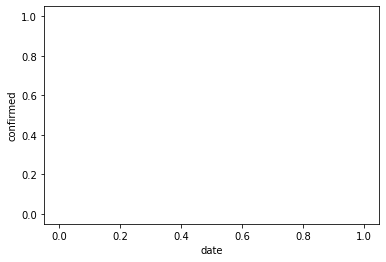

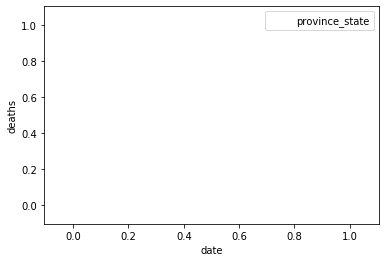

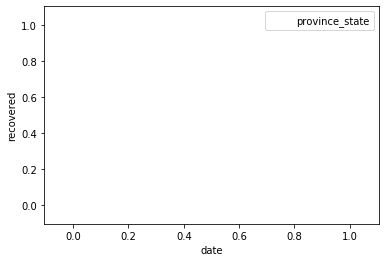

In [86]:
df = jhu_summary[jhu_summary['country_region']=='US'][jhu_summary['date']=='2020-04-15']

sns.lineplot(x='date',y='confirmed',data=df)
plt.show()

plt.clf() 
sns.lineplot(x='date',y='deaths',hue ='province_state',data=df)
plt.show()

plt.clf() 
sns.lineplot(x='date',y='recovered',hue ='province_state',data=df)
plt.show()